In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt

In [2]:
data_for_lstm = pd.read_csv('../Data/Updated Data_V1.csv')

In [3]:
data_for_lstm.drop('Unnamed: 0',inplace=True,axis = 1)

In [4]:
data_for_lstm.head(2)

,articleID,label,headline_v4,headline_postag,headline_stem
0,1,0,মুরগির হামলায় শেয়াল নিহত,মুরগির/NC হামলায়/NC শেয়াল/NC নিহত/JJ,মুগি হামলা শেয়াল নিহত
1,2,0,বিটিভিতে যেবার ইন্টারভিউ গেলাম,বিটিভিতে/NC যেবার/NV ইন্টারভিউ/NC গেলাম/VM,বিটিভিতে যেবা ইন্টারভিউ গে


In [5]:
data = data_for_lstm['headline_stem'].copy()

In [6]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import time
from keras import metrics
from tensorflow.keras.preprocessing.text import one_hot

In [7]:
corpus = []
for i in range(0, len(data)):
    review = data[i]
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

In [8]:
voc_size = 20000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[12177, 7553, 2180, 10084],
 [9563, 5597, 12678, 8401],
 [3493, 8655, 9036, 3942, 6538, 7826, 18519, 14684],
 [1066, 9128, 13721, 19858],
 [16103, 958, 9840, 14601, 18146, 4403],
 [14383, 15818, 9562, 3818, 19836, 9316, 12934],
 [6853, 17040, 17679, 2486, 11897, 13299],
 [12995, 9674, 9051, 8423, 2517, 5286, 18146, 4403],
 [18939, 9778, 7761, 19760, 4644, 11003],
 [18632, 1851, 15451, 1021, 18146, 4403],
 [10839, 5659, 2749, 18586, 5425, 10616, 19419, 5503, 11040],
 [19041, 2844, 11013, 18146, 4403],
 [16871, 19180, 6171, 3526, 8033, 16182, 9808, 2422, 5068],
 [14175, 13125, 8747, 1598, 14166, 18146, 4403],
 [17240, 17513, 11897, 16704, 258, 2034, 12220, 18971, 16704],
 [11316, 3952, 7753, 18699, 878, 929, 1087],
 [14266, 10468, 5477, 1022],
 [19030, 15469, 15722, 12103, 17056, 6149, 17440],
 [19156, 1122, 17600, 19742, 14807, 1158, 17477, 4254, 15782, 18146, 4403],
 [14920, 10229, 7966, 7895, 17583, 4145],
 [490, 17513, 9377, 1483, 10084],
 [1901, 14764, 16314, 9301, 5538, 13345, 145

In [9]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [10]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(data_for_lstm['label'])

In [11]:
from imblearn.combine import SMOTETomek
smk_tiagram = SMOTETomek(random_state=42)
X_vec_v1,Y_vec_v1=smk_tiagram.fit_sample(X_final,y_final)

In [12]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_final)))
print('Resampled dataset shape {}'.format(Counter(Y_vec_v1)))

Original dataset shape Counter({1: 52588, 0: 4527})
Resampled dataset shape Counter({0: 52131, 1: 52131})


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vec_v1, Y_vec_v1, test_size=0.30, random_state=42)

In [14]:
#CNN

embedding_dim = 90

model = Sequential()
model.add(layers.Embedding(voc_size, embedding_dim, input_length=sent_length))
model.add(layers.Conv1D(128,5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 90)            1800000   
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 128)           57728     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 1,859,040
Trainable params: 1,859,040
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128)

Epoch 1/5
571/571 [==============================] - 24s 42ms/step - loss: 0.3076 - accuracy: 0.8758 - val_loss: 0.2422 - val_accuracy: 0.9109
Epoch 2/5
571/571 [==============================] - 27s 48ms/step - loss: 0.1665 - accuracy: 0.9455 - val_loss: 0.2526 - val_accuracy: 0.9109
Epoch 3/5
571/571 [==============================] - 28s 50ms/step - loss: 0.1223 - accuracy: 0.9608 - val_loss: 0.2892 - val_accuracy: 0.9081
Epoch 4/5
571/571 [==============================] - 32s 56ms/step - loss: 0.0914 - accuracy: 0.9643 - val_loss: 0.3392 - val_accuracy: 0.9035
Epoch 5/5
571/571 [==============================] - 29s 51ms/step - loss: 0.0687 - accuracy: 0.9678 - val_loss: 0.4191 - val_accuracy: 0.9036


In [46]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9017437210046393

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     15602
           1       0.88      0.93      0.90     15653

    accuracy                           0.90     31255
   macro avg       0.90      0.90      0.90     31255
weighted avg       0.90      0.90      0.90     31255



In [17]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []

Epoch 1/5
652/652 [==============================] - 29s 44ms/step - loss: 0.3067 - accuracy: 0.8803 - val_loss: 0.2342 - val_accuracy: 0.9151
Epoch 2/5
652/652 [==============================] - 39s 60ms/step - loss: 0.1643 - accuracy: 0.9441 - val_loss: 0.2495 - val_accuracy: 0.9128
Epoch 3/5
652/652 [==============================] - 38s 58ms/step - loss: 0.1169 - accuracy: 0.9592 - val_loss: 0.2917 - val_accuracy: 0.9086
Epoch 4/5
652/652 [==============================] - 34s 53ms/step - loss: 0.0878 - accuracy: 0.9634 - val_loss: 0.3195 - val_accuracy: 0.9054
Epoch 5/5
652/652 [==============================] - 35s 53ms/step - loss: 0.0685 - accuracy: 0.9654 - val_loss: 0.4248 - val_accuracy: 0.9023


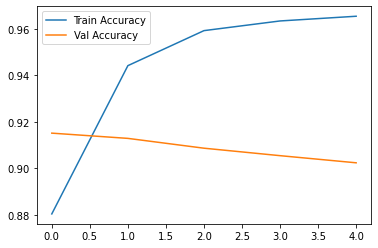

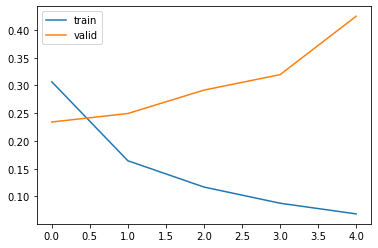

accuracy: 94.87%
Epoch 1/5
652/652 [==============================] - 36s 56ms/step - loss: 0.2994 - accuracy: 0.8752 - val_loss: 0.2314 - val_accuracy: 0.9164
Epoch 2/5
652/652 [==============================] - 37s 57ms/step - loss: 0.1695 - accuracy: 0.9439 - val_loss: 0.2402 - val_accuracy: 0.9159
Epoch 3/5
652/652 [==============================] - 32s 48ms/step - loss: 0.1261 - accuracy: 0.9590 - val_loss: 0.2644 - val_accuracy: 0.9115
Epoch 4/5
652/652 [==============================] - 32s 49ms/step - loss: 0.0963 - accuracy: 0.9632 - val_loss: 0.3170 - val_accuracy: 0.9069
Epoch 5/5
652/652 [==============================] - 34s 52ms/step - loss: 0.0757 - accuracy: 0.9638 - val_loss: 0.3787 - val_accuracy: 0.9038


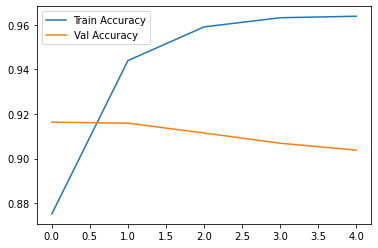

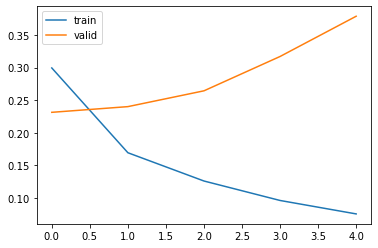

accuracy: 95.16%
Epoch 1/5
652/652 [==============================] - 33s 51ms/step - loss: 0.3310 - accuracy: 0.8652 - val_loss: 0.2444 - val_accuracy: 0.9097
Epoch 2/5
652/652 [==============================] - 33s 51ms/step - loss: 0.1684 - accuracy: 0.9435 - val_loss: 0.2390 - val_accuracy: 0.9147
Epoch 3/5
652/652 [==============================] - 34s 52ms/step - loss: 0.1180 - accuracy: 0.9584 - val_loss: 0.2788 - val_accuracy: 0.9076
Epoch 4/5
652/652 [==============================] - 35s 54ms/step - loss: 0.0913 - accuracy: 0.9627 - val_loss: 0.3291 - val_accuracy: 0.9052
Epoch 5/5
652/652 [==============================] - 34s 52ms/step - loss: 0.0756 - accuracy: 0.9643 - val_loss: 0.3684 - val_accuracy: 0.8954


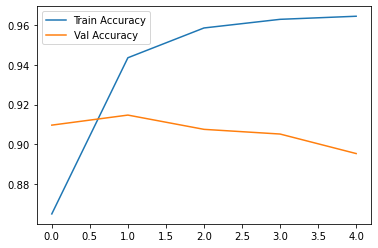

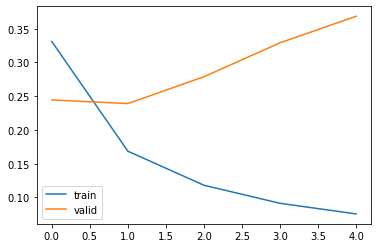

accuracy: 95.11%
Epoch 1/5
652/652 [==============================] - 37s 57ms/step - loss: 0.3031 - accuracy: 0.8754 - val_loss: 0.2338 - val_accuracy: 0.9175
Epoch 2/5
652/652 [==============================] - 33s 50ms/step - loss: 0.1724 - accuracy: 0.9436 - val_loss: 0.2383 - val_accuracy: 0.9170
Epoch 3/5
652/652 [==============================] - 31s 48ms/step - loss: 0.1356 - accuracy: 0.9579 - val_loss: 0.2575 - val_accuracy: 0.9143
Epoch 4/5
652/652 [==============================] - 31s 47ms/step - loss: 0.1102 - accuracy: 0.9625 - val_loss: 0.2866 - val_accuracy: 0.9078
Epoch 5/5
652/652 [==============================] - 30s 45ms/step - loss: 0.0896 - accuracy: 0.9634 - val_loss: 0.3470 - val_accuracy: 0.9028


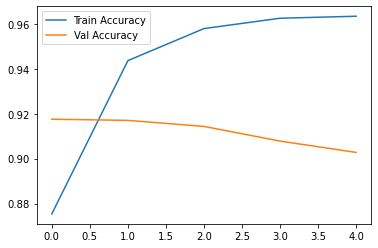

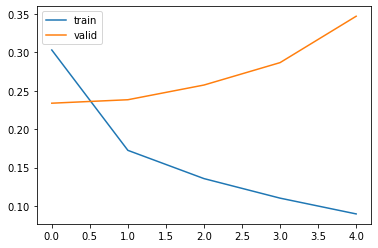

accuracy: 95.43%
Epoch 1/5
652/652 [==============================] - 31s 48ms/step - loss: 0.2993 - accuracy: 0.8841 - val_loss: 0.2295 - val_accuracy: 0.9165
Epoch 2/5
652/652 [==============================] - 31s 48ms/step - loss: 0.1662 - accuracy: 0.9437 - val_loss: 0.2446 - val_accuracy: 0.9139
Epoch 3/5
652/652 [==============================] - 33s 51ms/step - loss: 0.1198 - accuracy: 0.9580 - val_loss: 0.2838 - val_accuracy: 0.9087
Epoch 4/5
652/652 [==============================] - 36s 55ms/step - loss: 0.0922 - accuracy: 0.9627 - val_loss: 0.3365 - val_accuracy: 0.9053
Epoch 5/5
652/652 [==============================] - 36s 55ms/step - loss: 0.0743 - accuracy: 0.9642 - val_loss: 0.4057 - val_accuracy: 0.9032


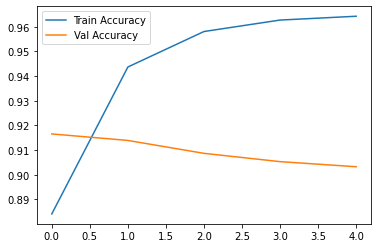

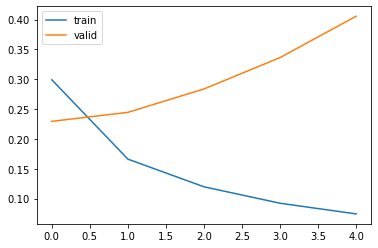

accuracy: 95.07%
95.13% (+/- 0.18%)


In [51]:
for train, test in kfold.split(X_vec_v1,Y_vec_v1):
    ## Creating model
    embedding_dim = 90

    model1 = Sequential()
    model1.add(layers.Embedding(voc_size, embedding_dim, input_length=sent_length))
    model1.add(layers.Conv1D(128,5, activation='relu'))
    model1.add(layers.GlobalMaxPooling1D())
    model1.add(layers.Dense(10, activation='relu'))
    model1.add(layers.Dense(2, activation='sigmoid'))
    model1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # Fit the model
    history = model1.fit(X_vec_v1[train], Y_vec_v1[train], epochs=2,validation_data=(X_vec_v1[test],Y_vec_v1[test]), batch_size=128)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'valid'])
    plt.show()
    # model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)
    # evaluate the model
    scores = model1.evaluate(X_vec_v1[test], Y_vec_v1[test], verbose=0)
    print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))


In [52]:
y_pred=model1.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9559110542313229

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     15602
           1       0.93      0.99      0.96     15653

    accuracy                           0.96     31255
   macro avg       0.96      0.96      0.96     31255
weighted avg       0.96      0.96      0.96     31255

